In [1]:
"""This module is meant to track the average temperatures of Dec through years 1960-2024 """

'This module is meant to track the average temperatures of Dec through years 1960-2024 '

In [2]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years

In [4]:
highs = []
avgs = []
lows = []
x = []
for year in years:
    high = np.mean(tp.collect_month(12,year,0))
    highs.append(high)
    
    avg = np.mean(tp.collect_month(12,year,1))
    avgs.append(avg)
    
    low = np.mean(tp.collect_month(12,year,2))
    lows.append(low)
    
    x.append(int(year))

highs = np.array(highs)
highs = highs[::-1]
avgs = np.array(avgs)
avgs = avgs[::-1]
lows = np.array(lows)
lows = lows[::-1]
x = x[::-1]


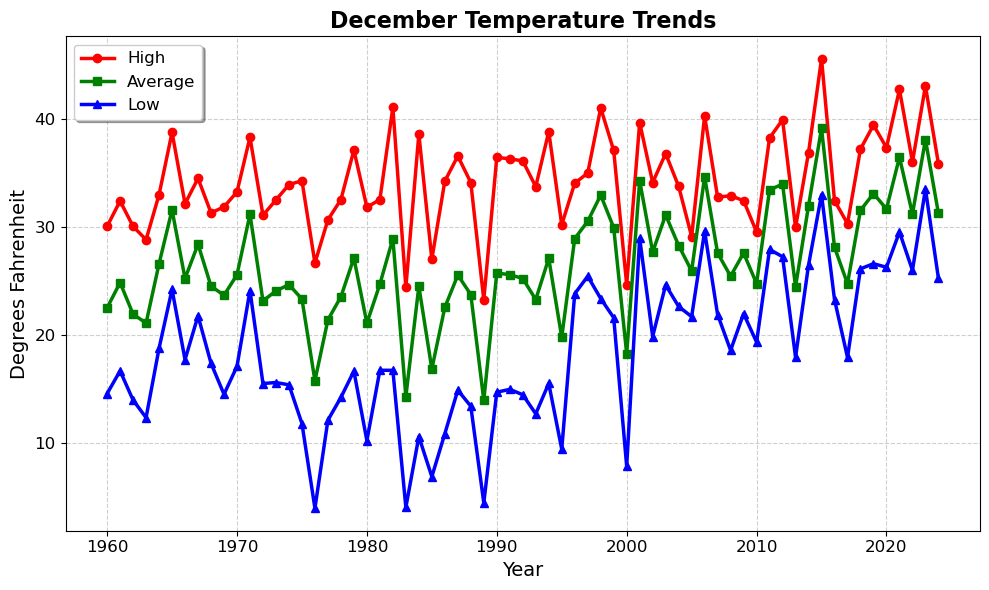

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Bigger, clearer figure

plt.plot(x, highs, color='red', linewidth=2.5, marker='o', label='High')
plt.plot(x, avgs, color='green', linewidth=2.5, marker='s', label='Average')
plt.plot(x, lows,  color='blue', linewidth=2.5, marker='^', label='Low')

plt.title("December Temperature Trends", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Degrees Fahrenheit", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, frameon=True, shadow=True, loc='best')

plt.tight_layout()
plt.show()


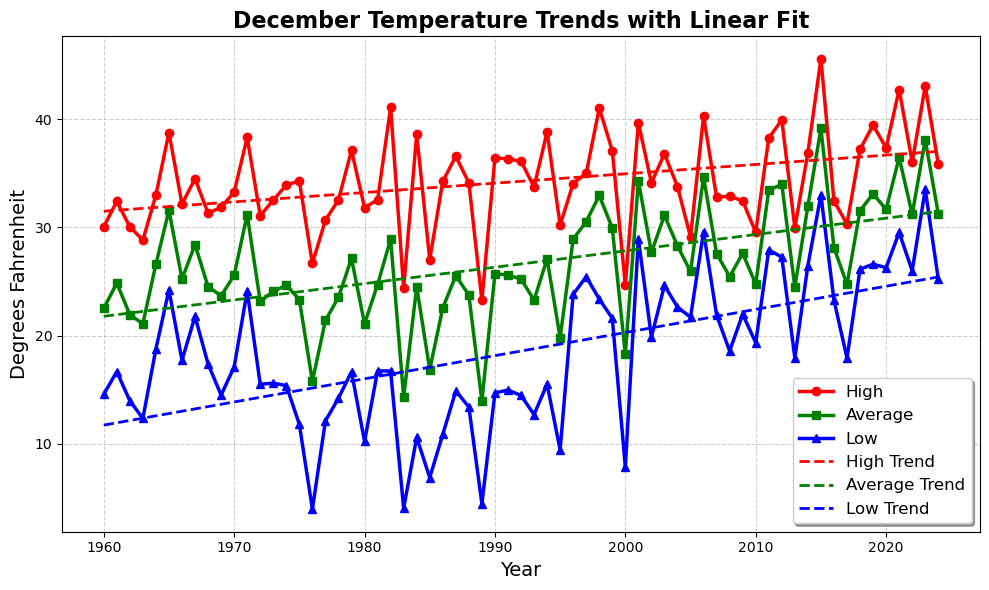

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Fit linear trends (degree 1 = straight line)
high_fit = np.polyfit(x, highs, 1)
avg_fit  = np.polyfit(x, avgs, 1)
low_fit  = np.polyfit(x, lows, 1)

# Create fitted y-values
high_trend = np.polyval(high_fit, x)
avg_trend  = np.polyval(avg_fit, x)
low_trend  = np.polyval(low_fit, x)

# Plot everything
plt.figure(figsize=(10, 6))

# Original data
plt.plot(x, highs, color='red', linewidth=2.5, marker='o', label='High')
plt.plot(x, avgs,  color='green', linewidth=2.5, marker='s', label='Average')
plt.plot(x, lows,  color='blue', linewidth=2.5, marker='^', label='Low')

# Trend lines
plt.plot(x, high_trend, 'r--', linewidth=2, label='High Trend')
plt.plot(x, avg_trend,  'g--', linewidth=2, label='Average Trend')
plt.plot(x, low_trend,  'b--', linewidth=2, label='Low Trend')

# Labels and formatting
plt.title("December Temperature Trends with Linear Fit", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Degrees Fahrenheit", fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [9]:
high_slope_per_decade = high_fit[0]*10
avg_slope_per_decade = avg_fit[0]*10
low_slope_per_decade = low_fit[0]*10
print("The average high has increased",high_slope_per_decade,"per decade.")
print("The average temperature has increased",avg_slope_per_decade,"per decade.")
print("The average low has increased",low_slope_per_decade,"per decade.")
print("Conclusion: The lows are getting warmer faster than the highs")
print(low_slope_per_decade*3.5)
print(high_slope_per_decade*3.5)

The average high has increased 0.8634671779833074 per decade.
The average temperature has increased 1.5114524588314913 per decade.
The average low has increased 2.138334649221745 per decade.
Conclusion: The lows are getting warmer faster than the highs
7.484171272276108
3.022135122941576


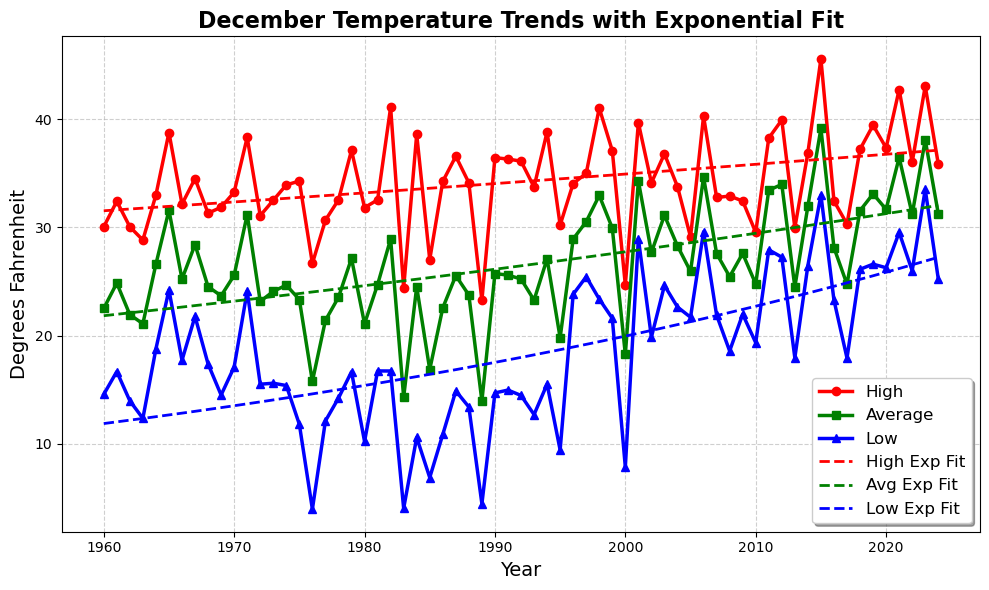

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential function
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit exponential curves
high_params, _ = curve_fit(exp_func, x, highs, p0=(1, 0.001))
avg_params, _  = curve_fit(exp_func, x, avgs,  p0=(1, 0.001))
low_params, _  = curve_fit(exp_func, x, lows,  p0=(1, 0.001))

# Generate trend lines
x_fit = np.linspace(np.min(x), np.max(x), 200)
high_trend = exp_func(x_fit, *high_params)
avg_trend  = exp_func(x_fit, *avg_params)
low_trend  = exp_func(x_fit, *low_params)

# Plot everything
plt.figure(figsize=(10, 6))

# Original data
plt.plot(x, highs, color='red', linewidth=2.5, marker='o', label='High')
plt.plot(x, avgs,  color='green', linewidth=2.5, marker='s', label='Average')
plt.plot(x, lows,  color='blue', linewidth=2.5, marker='^', label='Low')

# Exponential trend lines
plt.plot(x_fit, high_trend, 'r--', linewidth=2, label='High Exp Fit')
plt.plot(x_fit, avg_trend,  'g--', linewidth=2, label='Avg Exp Fit')
plt.plot(x_fit, low_trend,  'b--', linewidth=2, label='Low Exp Fit')

# Labels and formatting
plt.title("December Temperature Trends with Exponential Fit", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Degrees Fahrenheit", fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [13]:
year1 = 1990
year2 = 2025

mean_1990 = exp_func(year1, *avg_params)
mean_2020 = exp_func(year2, *avg_params)
shift = mean_2020 - mean_1990

print(f"Avg Temp in 1990 (from fit): {mean_1990:.2f} °F")
print(f"Avg Temp in 2020 (from fit): {mean_2020:.2f} °F")
print(f"Shift from 1990 to 2020: {shift:.2f} °F")

Avg Temp in 1990 (from fit): 26.14 °F
Avg Temp in 2020 (from fit): 32.23 °F
Shift from 1990 to 2020: 6.08 °F
